In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#read csv files
data_path = "/content/drive/MyDrive/DSML_dataset/"
train_df = pd.read_csv(data_path+'dengue_features_train.csv')
test_df = pd.read_csv(data_path+'dengue_features_test.csv')
train_labels =  pd.read_csv(data_path+'dengue_labels_train.csv')


In [4]:
train_labels.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [5]:
test_df.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [6]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         1456 non-null   object
 1   year         1456 non-null   int64 
 2   weekofyear   1456 non-null   int64 
 3   total_cases  1456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [8]:
train_df.dtypes

city                                      object
year                                       int64
weekofyear                                 int64
week_start_date                           object
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rn

      We observe train and test data has numeric features data type in float type.

# Data Pre-processing/Data Cleaning/Data Wrangling

In [9]:
#Preprocessing the train set.
train_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


We observe some missing values above, we evaluate these missing values.

In [10]:
#Finding missing values
missingdata = train_df.notnull()
missingdata.head(17)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [11]:
print(missingdata['ndvi_ne'].value_counts())

ndvi_ne
True     1262
False     194
Name: count, dtype: int64


In [12]:
for column in missingdata.columns.values.tolist(): #.values converts these column labels into an array..tolist() converts the array of column labels into a Python list.
  print(missingdata[column].value_counts())
  print("")

city
True    1456
Name: count, dtype: int64

year
True    1456
Name: count, dtype: int64

weekofyear
True    1456
Name: count, dtype: int64

week_start_date
True    1456
Name: count, dtype: int64

ndvi_ne
True     1262
False     194
Name: count, dtype: int64

ndvi_nw
True     1404
False      52
Name: count, dtype: int64

ndvi_se
True     1434
False      22
Name: count, dtype: int64

ndvi_sw
True     1434
False      22
Name: count, dtype: int64

precipitation_amt_mm
True     1443
False      13
Name: count, dtype: int64

reanalysis_air_temp_k
True     1446
False      10
Name: count, dtype: int64

reanalysis_avg_temp_k
True     1446
False      10
Name: count, dtype: int64

reanalysis_dew_point_temp_k
True     1446
False      10
Name: count, dtype: int64

reanalysis_max_air_temp_k
True     1446
False      10
Name: count, dtype: int64

reanalysis_min_air_temp_k
True     1446
False      10
Name: count, dtype: int64

reanalysis_precip_amt_kg_per_m2
True     1446
False      10
Name: count, dty

In [13]:
#alternative way of checking
train_df.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

Since, we have all the missing columns, we can decide what to do with them.
The "ndvi_ne" has 194 missing values, this is a lot of missing values.

Summary statistics of data

In [14]:
train_df.describe(include="float")

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,303.427109,295.719156,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,3.234601,2.565364,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,297.800000,286.900000,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,301.000000,293.900000,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,302.400000,296.200000,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,305.500000,297.900000,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,314.000000,299.900000,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [15]:
train_labels['total_cases'].describe()

count    1456.000000
mean       24.675137
std        43.596000
min         0.000000
25%         5.000000
50%        12.000000
75%        28.000000
max       461.000000
Name: total_cases, dtype: float64

Check for distinction between the two cities San Juan sj and Iquitos iq

In [16]:
train_df[train_df['city']== 'sj'].describe(include='float') # summary statistics of the numric features of the train dataset where city is sj

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,745.000000,887.000000,917.000000,917.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,927.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,0.057925,0.067469,0.177655,0.165956,35.470809,299.163653,299.276920,295.109519,301.398817,297.301828,30.465419,78.568181,35.470809,16.552409,2.516267,27.006528,6.757373,31.607957,22.600645,26.785484
std,0.107153,0.092479,0.057166,0.056073,44.606137,1.236429,1.218637,1.569943,1.258927,1.294705,35.628055,3.389488,44.606137,1.560923,0.498892,1.415473,0.835993,1.717297,1.506277,29.325811
min,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,297.800000,292.600000,0.000000,66.735714,0.000000,11.715714,1.357143,22.842857,4.528571,26.700000,17.800000,0.000000
25%,0.004500,0.016425,0.139283,0.129157,0.000000,298.195000,298.300000,293.847857,300.400000,296.300000,10.825000,76.246071,0.000000,15.236429,2.157143,25.842857,6.200000,30.600000,21.700000,6.825000
50%,0.057700,0.068075,0.177186,0.165971,20.800000,299.254286,299.378571,295.464286,301.500000,297.500000,21.300000,78.667857,20.800000,16.845714,2.457143,27.228571,6.757143,31.700000,22.800000,17.750000
75%,0.111100,0.115200,0.212557,0.202771,52.180000,300.132857,300.228571,296.418929,302.400000,298.400000,37.000000,80.963214,52.180000,17.858571,2.800000,28.185714,7.285714,32.800000,23.900000,35.450000
max,0.493400,0.437100,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,304.300000,299.900000,570.500000,87.575714,390.600000,19.440000,4.428571,30.071429,9.914286,35.600000,25.600000,305.900000


In [17]:
train_df[train_df['city']== 'iq'].describe(include='float') # summary statistics of the numeric features of the train dataset where city is iq

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,517.000000,517.000000,517.000000,517.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,483.000000,483.000000,506.000000,512.000000,504.000000
mean,0.263869,0.238783,0.250126,0.266779,64.245736,297.869538,299.133043,295.492982,307.082752,292.866667,57.609864,88.639117,64.245736,17.096110,9.206783,27.530933,10.566197,34.004545,21.196680,62.467262
std,0.081370,0.076751,0.077354,0.086345,35.218995,1.170997,1.332073,1.417229,2.382980,1.663069,50.286555,7.583889,35.218995,1.445769,2.448525,0.921769,1.535496,1.325261,1.260327,63.245958
min,0.061729,0.035860,0.029880,0.064183,0.000000,294.635714,294.892857,290.088571,300.000000,286.900000,0.000000,57.787143,0.000000,12.111429,3.714286,21.400000,5.200000,30.100000,14.700000,0.000000
25%,0.200000,0.179540,0.194743,0.204129,39.105000,297.092500,298.221429,294.593929,305.200000,291.975000,24.065000,84.295000,39.105000,16.102857,7.371429,27.000000,9.500000,33.200000,20.600000,17.200000
50%,0.263643,0.232971,0.249800,0.262143,60.470000,297.822857,299.121429,295.852143,307.050000,293.050000,46.440000,90.917143,60.470000,17.428571,8.964286,27.600000,10.625000,34.000000,21.300000,45.300000
75%,0.319971,0.293929,0.302300,0.325150,85.757500,298.649286,300.123214,296.548571,308.700000,294.200000,71.072500,94.563929,85.757500,18.180357,11.014286,28.100000,11.655000,34.900000,22.000000,85.950000
max,0.508357,0.454429,0.538314,0.546017,210.830000,301.637143,302.928571,298.450000,314.000000,296.000000,362.030000,98.610000,210.830000,20.461429,16.028571,30.800000,15.800000,42.200000,24.200000,543.300000


Based on the above summary statistics the following we observed:


*   The vegetation in Iquitos is uniform compared to San Juan which has a higher vegetation in the south than in the north.
*   The Iquitos has an higher average precipitation 64.25 than San Juan 35.47
*   Temperatures are fairly simiar in both cities with Iquitos having tendencies for slightly higher temperatures compared to San Juan
*   Iquitos has a higher relative humidity compared to San Juan






Checking the correlation between the variables

In [18]:
train_features= train_df.iloc[:, 4:]
train_features.corr()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
ndvi_ne,1.000000,0.850902,0.614380,0.669504,0.205736,-0.340976,-0.037682,0.056077,0.634330,-0.623116,0.199411,0.457985,0.205736,0.094852,0.673935,0.186227,0.658129,0.491922,-0.315696,0.242263
ndvi_nw,0.850902,1.000000,0.555809,0.651938,0.193563,-0.317862,-0.030974,0.063289,0.606775,-0.588806,0.190989,0.449152,0.193563,0.100626,0.645596,0.203975,0.649483,0.490122,-0.304206,0.221314
ndvi_se,0.614380,0.555809,1.000000,0.820924,0.074633,-0.157447,0.051348,0.002810,0.468054,-0.407931,0.034792,0.215606,0.074633,0.028795,0.486047,0.089242,0.449599,0.290691,-0.251621,0.131326
ndvi_sw,0.669504,0.651938,0.820924,1.000000,0.124047,-0.227824,0.022533,0.020746,0.546460,-0.494284,0.101652,0.311759,0.124047,0.053437,0.569554,0.121060,0.545899,0.377393,-0.294684,0.158345
precipitation_amt_mm,0.205736,0.193563,0.074633,0.124047,1.000000,-0.017229,0.106384,0.434722,0.282721,-0.119691,0.481159,0.499984,1.000000,0.451202,0.201427,0.225408,0.193358,0.296215,0.076680,0.486637
reanalysis_air_temp_k,-0.340976,-0.317862,-0.157447,-0.227824,-0.017229,1.000000,0.901777,0.529771,-0.001211,0.736765,-0.128219,-0.402338,-0.017229,0.508380,-0.280375,0.619974,-0.261457,0.227768,0.719612,-0.173851
reanalysis_avg_temp_k,-0.037682,-0.030974,0.051348,0.022533,0.106384,0.901777,1.000000,0.614268,0.398224,0.436689,-0.031728,-0.168371,0.106384,0.612484,0.124200,0.751330,0.107581,0.512220,0.579864,-0.048052
reanalysis_dew_point_temp_k,0.056077,0.063289,0.002810,0.020746,0.434722,0.529771,0.614268,1.000000,0.257380,0.361781,0.432970,0.553766,0.434722,0.997051,-0.033512,0.743506,0.037151,0.492319,0.651535,0.241335
reanalysis_max_air_temp_k,0.634330,0.606775,0.468054,0.546460,0.282721,-0.001211,0.398224,0.257380,1.000000,-0.600850,0.192261,0.400093,0.282721,0.300278,0.918578,0.469668,0.834263,0.763446,-0.193709,0.251177
reanalysis_min_air_temp_k,-0.623116,-0.588806,-0.407931,-0.494284,-0.119691,0.736765,0.436689,0.361781,-0.600850,1.000000,-0.105815,-0.410714,-0.119691,0.318592,-0.815511,0.216543,-0.715676,-0.271495,0.720701,-0.237142


We observe high, moderate,low positive and negative correlation between variables. We can put the results into perspective by plotting the heatmap

<Axes: >

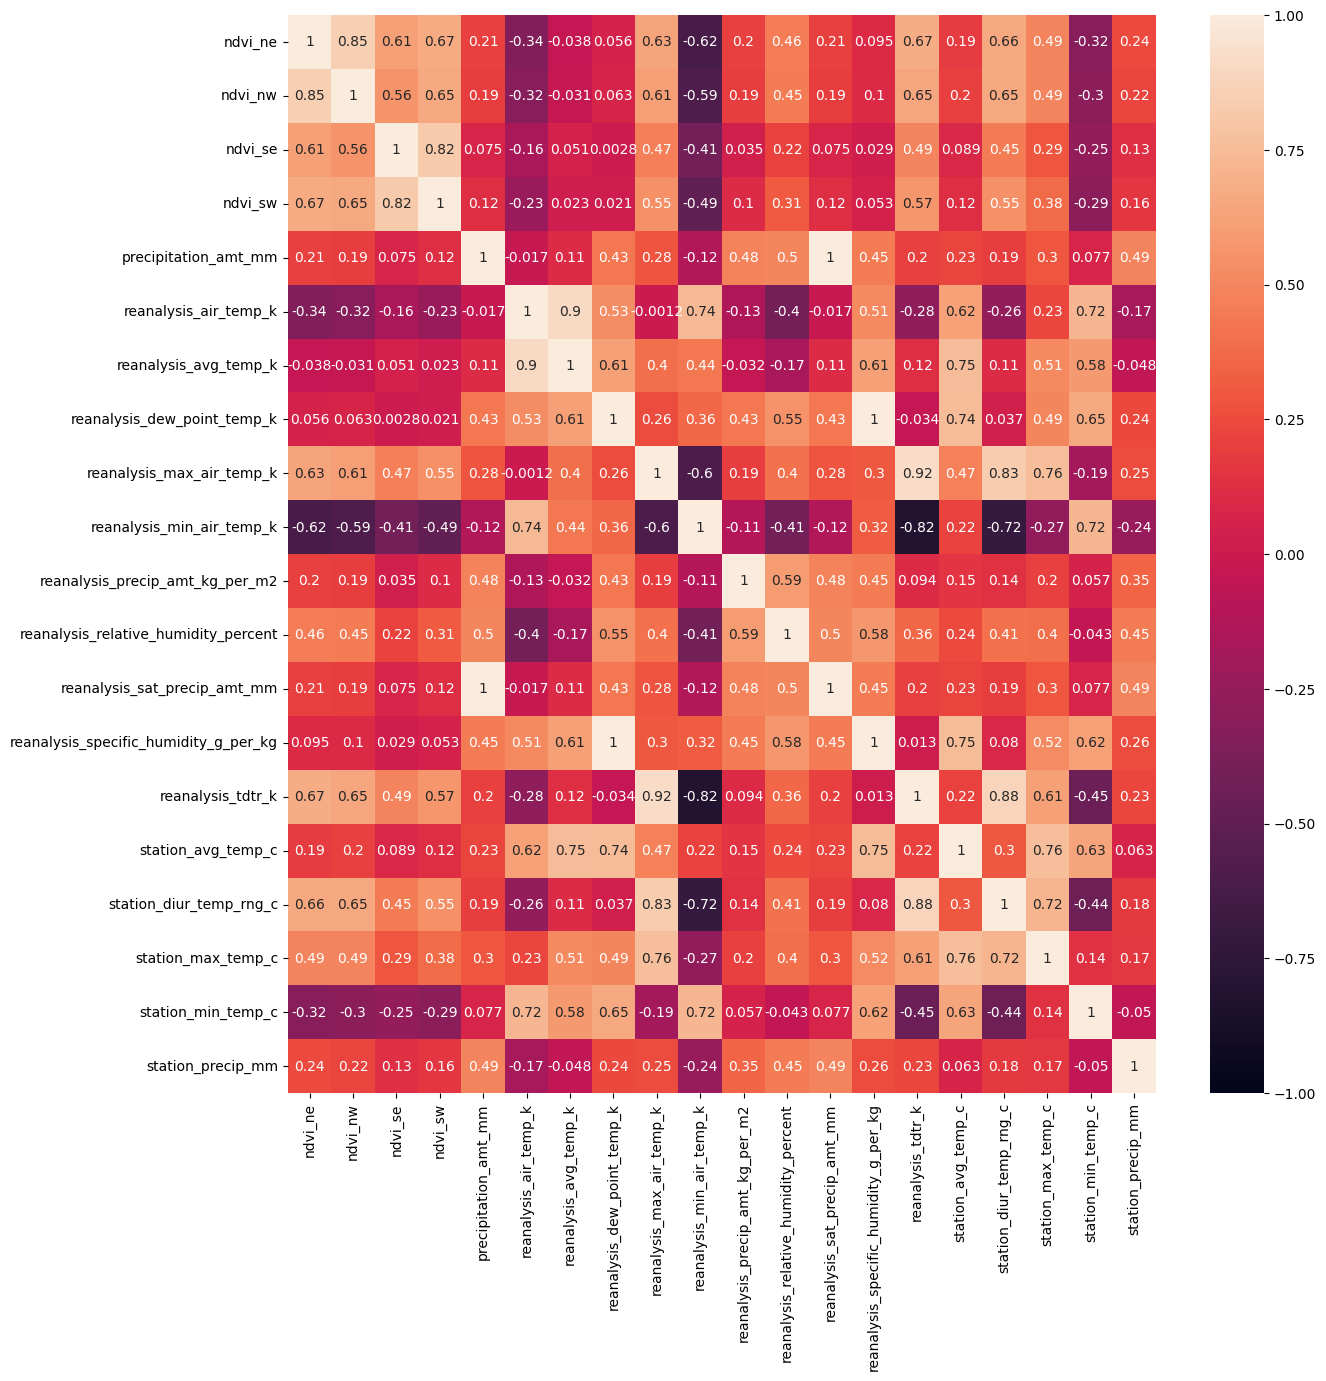

In [19]:
import seaborn as sns
plt.figure(figsize =(14,14))
sns.heatmap(train_features.corr(),vmin = -1, vmax = 1, annot=True)


Based on the Heatmap above, we observe the following:


*   Vegetation at north east "ndvi_ne" and north west  "ndvi_nw"are highly positively correlated at 0.85 and the vegetation south east "ndvi_se" and southwest "ndvi_sw" positively correlated at 0.82

*   The Average air temperature "reanalysis_avg_temp_k" and  Mean air temperature "reanalysis_air_temp_k" are highly positively correlated at 0.90

*   The Diurnal temperature range "reanalysis_tdtr_k" and Maximum air temperature "reanalysis_max_air_temp_k" are highly positively correlated at 0.92


*    The Diurnal temperature range "reanalysis_tdtr_k" and Total precipitation "reanalysis_precip_amt_kg_per_m2" have a low correlation of 0.094


*   The Mean relative humidity "reanalysis_relative_humidity_percent" and Minimum temperature "station_min_temp_c" have low negative correlation -0.043






# Feature Engineering



1.   Dealing with missing values
2.   Combining highly similar features
3. dropping non-features columns and correlated columns




1.   Dealing with missing values

In [20]:
train_df.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [55]:
# missing_indices = train_df.index[train_df['ndvi_ne'].isna()]

# # Calculating gap lengths
# gap_lengths = missing_indices.to_series().diff() - 1
# gap_lengths = gap_lengths[gap_lengths > 0]
# gap_lengths.head(10)
# # statistics about gap lengths to  decide on interpolation
# print(gap_lengths.describe())


# # Defining "short" as 2 weeks or less
# short_gaps = gap_lengths[gap_lengths <= 2]
# if len(short_gaps) / len(gap_lengths) > 0.5:  # if gaps are "short" ,  Arbitrary threshold: 50% of gaps are short
#     print("Most gaps are short. Linear interpolation is likely suitable.")
# else:
#     print("Many gaps are not short. Consider other methods for handling missing values.")

In [54]:
#train_df.head(35)

Replacing the missing values of the ndvi_ne mirroring the median value of the vegetation of the same city and around the same period 'week of the year'.

In [53]:
# missing_ndvi_ne = train_df.groupby(['city', 'weekofyear']).apply(lambda x: x[x['ndvi_ne'].isna()])
# missing_ndvi_ne


In [27]:
train_df['ndvi_ne'] = train_df.groupby(['city', 'weekofyear'])['ndvi_ne'].transform(lambda x: x.fillna(x.median()))
train_df['ndvi_ne'].fillna(train_df['ndvi_ne'].mean(), inplace=True) #replacing other missing values not having matching weeks with the mean vegetation

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [28]:
train_df['ndvi_ne'].isna().sum() #no more null value of ndvi_ne

0

Handling all other nulll values

In [37]:
train_df.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   0
ndvi_nw                                  52
ndvi_se                                  22
ndvi_sw                                  22
precipitation_amt_mm                     13
reanalysis_air_temp_k                    10
reanalysis_avg_temp_k                    10
reanalysis_dew_point_temp_k              10
reanalysis_max_air_temp_k                10
reanalysis_min_air_temp_k                10
reanalysis_precip_amt_kg_per_m2          10
reanalysis_relative_humidity_percent     10
reanalysis_sat_precip_amt_mm             13
reanalysis_specific_humidity_g_per_kg    10
reanalysis_tdtr_k                        10
station_avg_temp_c                       43
station_diur_temp_rng_c                  43
station_max_temp_c                       20
station_min_temp_c              

In [47]:
#Replacing null values for ndvi_nw, ndvi_se, ndvi_sw, station_avg_temp_c and station_diur_temp_rng_c by median values per city per week of the year.

def inputation(feature):
    train_df[feature]= train_df.groupby(['city', 'weekofyear'])[feature].transform(lambda x: x.fillna(x.median()))
    train_df[feature].fillna(train_df[feature].mean(), inplace=True)
inputation('ndvi_nw')
inputation('ndvi_se')
inputation('ndvi_sw')
inputation('station_avg_temp_c')
inputation('station_diur_temp_rng_c')
print(train_df.isna().sum())

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
precipitation_amt_mm                     13
reanalysis_air_temp_k                    10
reanalysis_avg_temp_k                    10
reanalysis_dew_point_temp_k              10
reanalysis_max_air_temp_k                10
reanalysis_min_air_temp_k                10
reanalysis_precip_amt_kg_per_m2          10
reanalysis_relative_humidity_percent     10
reanalysis_sat_precip_amt_mm             13
reanalysis_specific_humidity_g_per_kg    10
reanalysis_tdtr_k                        10
station_avg_temp_c                        0
station_diur_temp_rng_c                   0
station_max_temp_c                       20
station_min_temp_c              

/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [52]:
#For missing values less than 15 we could replace with the modal values during that period
def imputation():
  for feature in train_df.columns:
        if train_df[feature].dtype in ['float64']:
            train_df[feature] = train_df.groupby(['city', 'weekofyear'])[feature].transform(lambda x: x.fillna(x.mode()))
            # For any still missing values, we fill them with the column's overall mean
            train_df[feature].fillna(train_df[feature].mean(), inplace=True)
imputation()
print(train_df.isna().sum())

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre


2. dropping non-features columns and correlated columns


<Axes: >

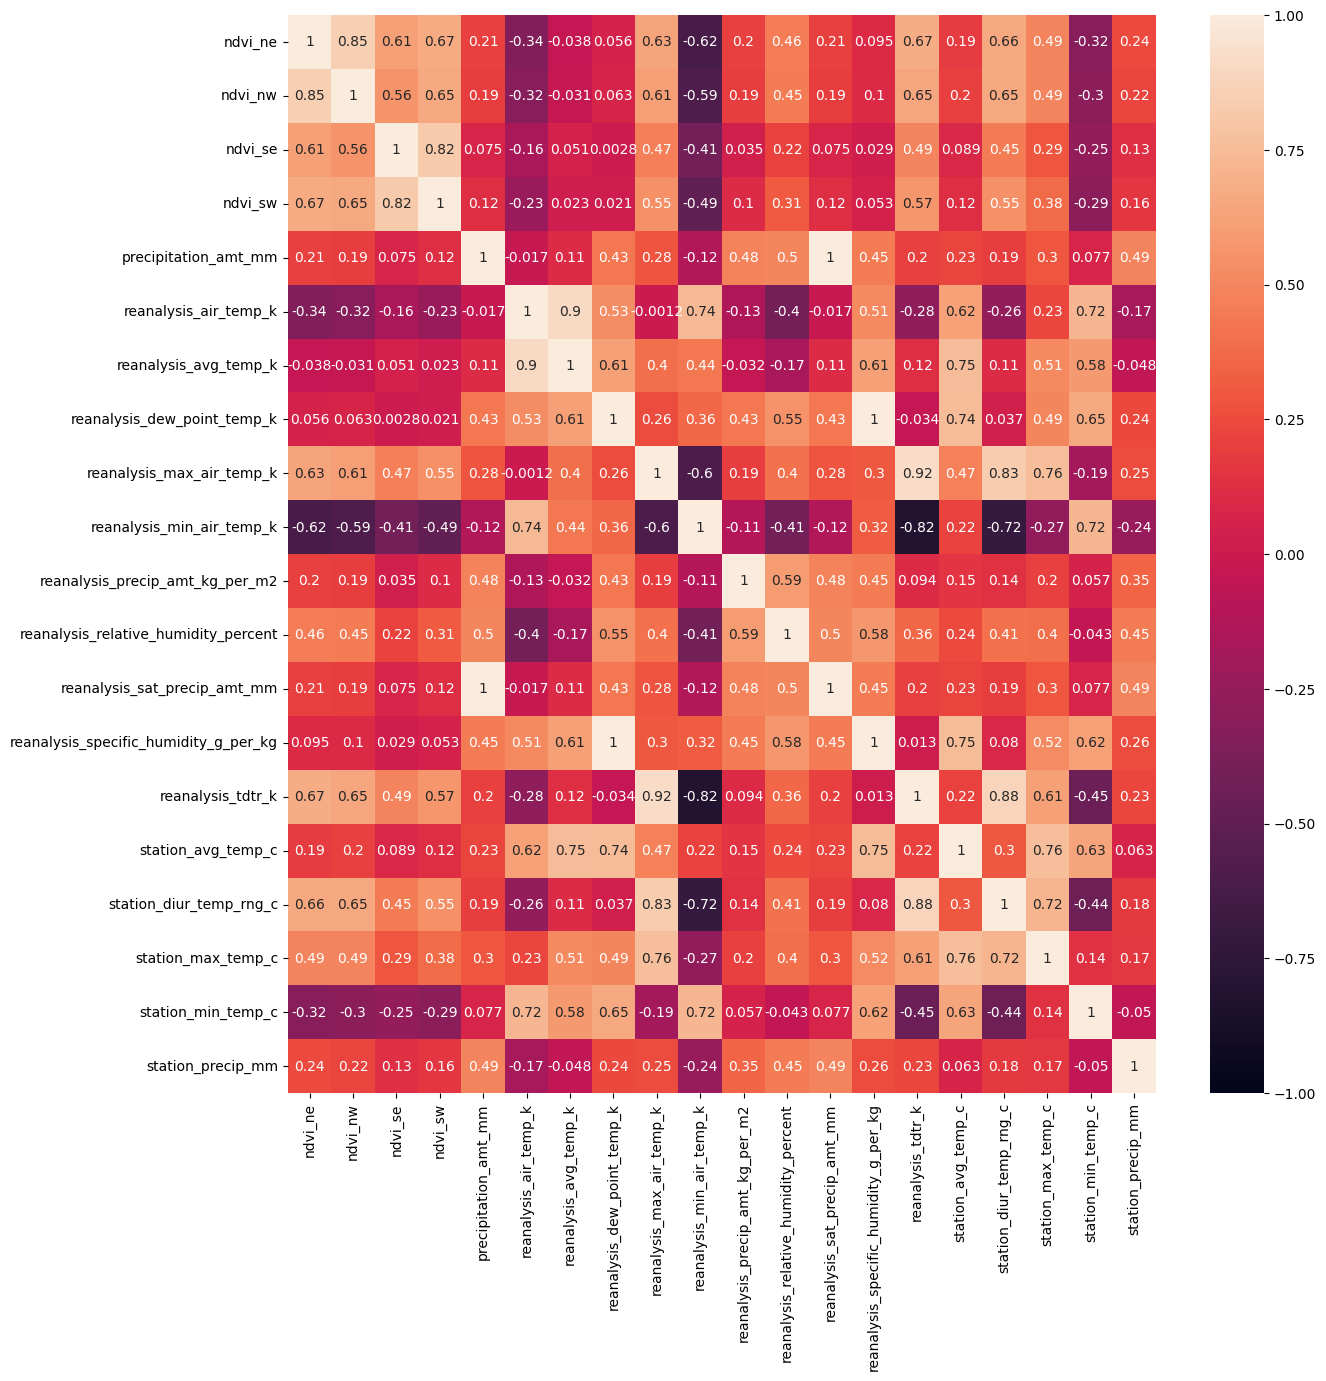

In [56]:
import seaborn as sns
plt.figure(figsize =(14,14))
sns.heatmap(train_features.corr(),vmin = -1, vmax = 1, annot=True)


In [59]:
#dropping highly correlated columns
train_df=train_df.drop(['reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k','reanalysis_air_temp_k'], axis =1)

In [60]:
train_df.head(2)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.1226,0.103725,0.198483,0.177617,12.42,297.742857,292.414286,299.8,295.9,32.00,73.365714,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.1699,0.142175,0.162357,0.155486,22.82,298.442857,293.951429,300.9,296.4,17.94,77.368571,26.714286,6.371429,31.7,22.2,8.6


3.   Combining highly similar features

In [62]:
#combining the east and west , so we have just north and south vegetation
train_df =train_df.assign(ndvi_n = lambda x: (x['ndvi_ne'] + x['ndvi_nw']) /2,\
                          ndvi_s =lambda x :( x['ndvi_se']+ x['ndvi_sw'])/2)\
                          .drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',\
                                 'year', 'weekofyear', 'week_start_date'], axis = 1)

In [63]:
train_df.head()

,city,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,ndvi_n,ndvi_s
0,sj,12.42,297.742857,292.414286,299.8,295.9,32.00,73.365714,25.442857,6.900000,29.4,20.0,16.0,0.113162,0.188050
1,sj,22.82,298.442857,293.951429,300.9,296.4,17.94,77.368571,26.714286,6.371429,31.7,22.2,8.6,0.156037,0.158921
2,sj,34.54,298.878571,295.434286,300.5,297.3,26.10,82.052857,26.714286,6.485714,32.2,22.8,41.4,0.102608,0.164021
3,sj,15.36,299.228571,295.310000,301.4,297.0,13.90,80.337143,27.471429,6.771429,33.3,23.3,4.0,0.186850,0.231721
4,sj,7.52,299.664286,295.821429,301.9,297.5,12.20,80.460000,28.942857,9.371429,35.0,23.9,5.8,0.229200,0.249270


In [64]:
cols = ['ndvi_n', 'ndvi_s'] + [col for col in train_df.columns if col not in ['ndvi_n', 'ndvi_s']]
train_df = train_df[cols]

In [65]:
train_df.head()

,ndvi_n,ndvi_s,city,precipitation_amt_mm,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.113162,0.188050,sj,12.42,297.742857,292.414286,299.8,295.9,32.00,73.365714,25.442857,6.900000,29.4,20.0,16.0
1,0.156037,0.158921,sj,22.82,298.442857,293.951429,300.9,296.4,17.94,77.368571,26.714286,6.371429,31.7,22.2,8.6
2,0.102608,0.164021,sj,34.54,298.878571,295.434286,300.5,297.3,26.10,82.052857,26.714286,6.485714,32.2,22.8,41.4
3,0.186850,0.231721,sj,15.36,299.228571,295.310000,301.4,297.0,13.90,80.337143,27.471429,6.771429,33.3,23.3,4.0
4,0.229200,0.249270,sj,7.52,299.664286,295.821429,301.9,297.5,12.20,80.460000,28.942857,9.371429,35.0,23.9,5.8
